Import Dataset and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


There are thirteen features and one target as below:
1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
4. trtbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalachh: The person's maximum heart rate achieved
9. exng: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slp: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. caa: The number of major vessels (0-3)
13. thall: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. output : 0=low risk of heart attack, 1=high risk of heart attack



  target: Heart disease (0 = no, 1 = yes)

In [3]:
df.shape

(303, 14)

Check Missing Values


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null values

Check Duplicate Values

In [5]:
df_dup=df.duplicated().any()
print(df_dup)

True


The dataset contains duplicate values. We will drop the duplicate values.

In [6]:
df=df.drop_duplicates()

In [7]:
# Checking again to see if duplicate values are still present in our dataset
df_dup=df.duplicated().any()
print(df_dup)

False


Understanding our Data

In [8]:
# correlation
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

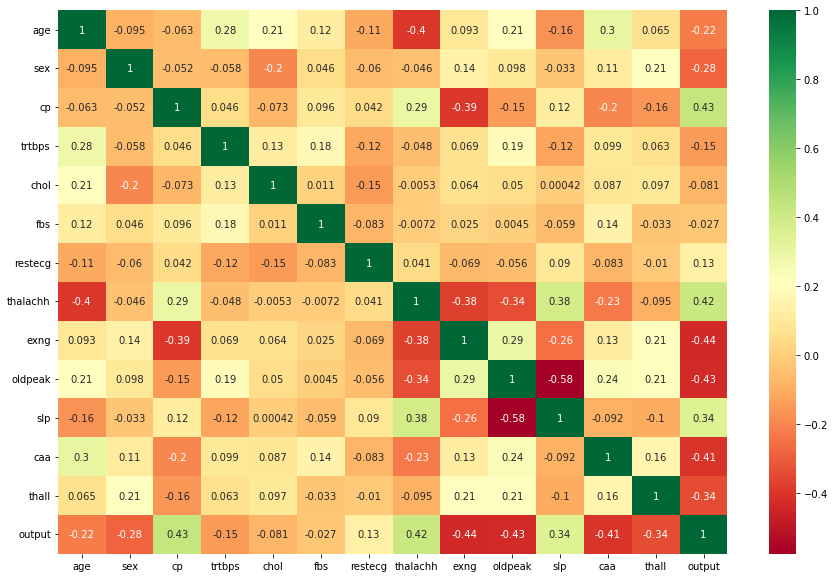

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

<AxesSubplot:title={'center':'Age of Patients'}, xlabel='age', ylabel='count'>

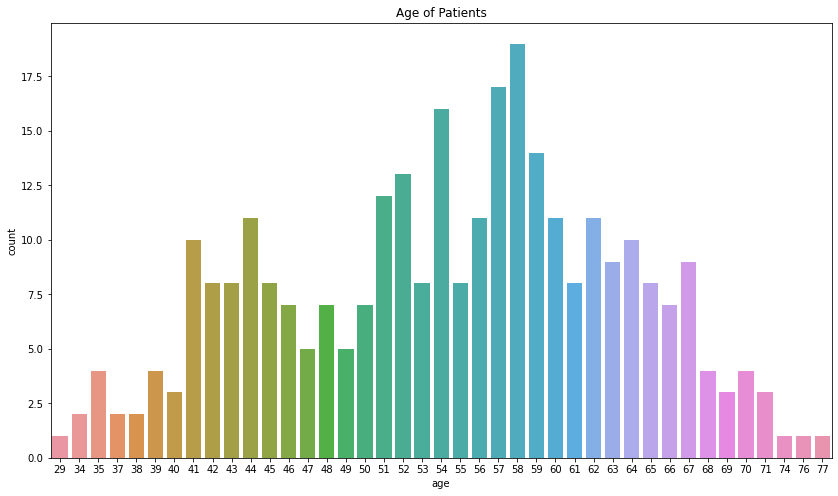

In [10]:
plt.figure(figsize=(14,8))
plt.title('Age of Patients')
plt.xlabel('Age')
sns.countplot(x='age', data=df)

The majority of patients are in 51-67 age group.

<AxesSubplot:title={'center':'Sex of the patients (0=Female and 1=Male)'}, xlabel='sex', ylabel='count'>

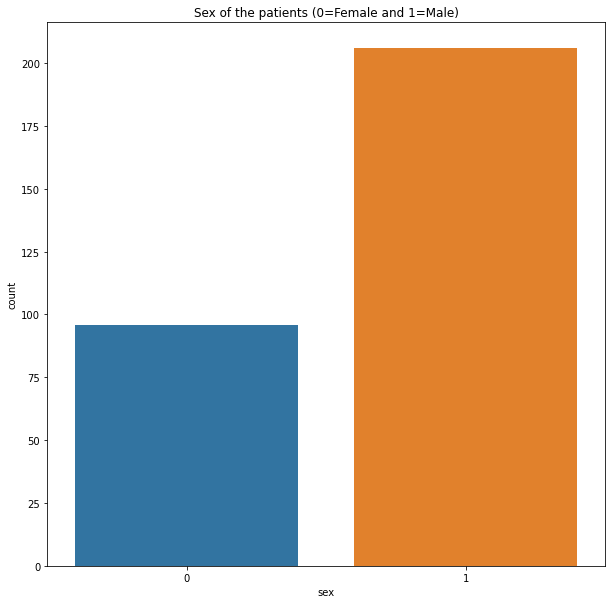

In [11]:
plt.figure(figsize=(10,10))
plt.title('Sex of the patients (0=Female and 1=Male)')
sns.countplot(x='sex',data=df)

The majority of patients are Male.

In [12]:
cp_data=df['cp'].value_counts().reset_index()
cp_data.columns=['Type of Chest Pain','No. of Patients']
print(cp_data)

   Type of Chest Pain  No. of Patients
0                   0              143
1                   2               86
2                   1               50
3                   3               23


In [13]:
cp_data['Type of Chest Pain'][0]='Typical Anigma'
cp_data['Type of Chest Pain'][1]='Non-Anginal' # 2=Non-Anignal
cp_data['Type of Chest Pain'][2]='Atypical Anigma' # 1=Atypical
cp_data['Type of Chest Pain'][3]='Asymptotic'
print(cp_data)

  Type of Chest Pain  No. of Patients
0     Typical Anigma              143
1        Non-Anginal               86
2    Atypical Anigma               50
3         Asymptotic               23


<AxesSubplot:title={'center':'Patients with Chest Pain'}, xlabel='Type of Chest Pain', ylabel='No. of Patients'>

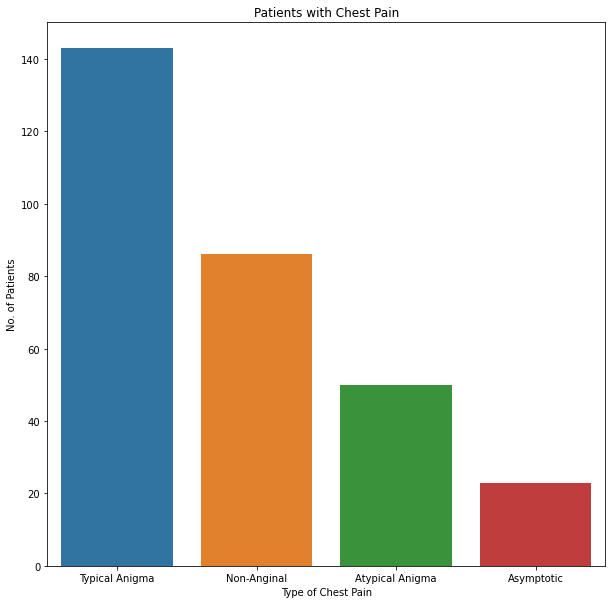

In [14]:
plt.figure(figsize=(10,10))
plt.title('Patients with Chest Pain')
sns.barplot(x=cp_data['Type of Chest Pain'], y=cp_data['No. of Patients'])

In [15]:
ecg_data=df['restecg'].value_counts().reset_index()
ecg_data.columns=['Type of ECG', 'No. of Patients'] 
print(ecg_data)

   Type of ECG  No. of Patients
0            1              151
1            0              147
2            2                4


restecg: Resting electrocardiographic measurement 
0 = normal
1 = having ST-T wave abnormality
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria


In [16]:
ecg_data['Type of ECG'][0]='Having ST-T wave abnormality'
ecg_data['Type of ECG'][1]='Normal'
ecg_data['Type of ECG'][2]="Showing probable or definite left ventricular hypertrophy by Estes' criteria"
print(ecg_data)

                                         Type of ECG  No. of Patients
0                       Having ST-T wave abnormality              151
1                                             Normal              147
2  Showing probable or definite left ventricular ...                4


<AxesSubplot:title={'center':'Resting Electrocardiographic Measurement'}, xlabel='Type of ECG', ylabel='No. of Patients'>

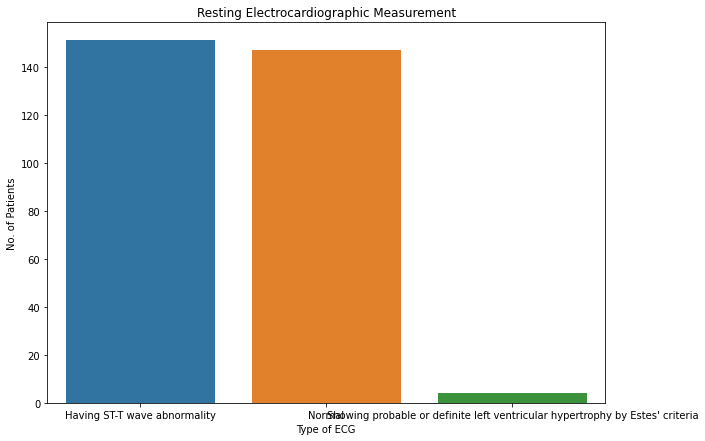

In [17]:
plt.figure(figsize=(10,7))
plt.title('Resting Electrocardiographic Measurement')
sns.barplot(x=ecg_data['Type of ECG'], y=ecg_data['No. of Patients'])

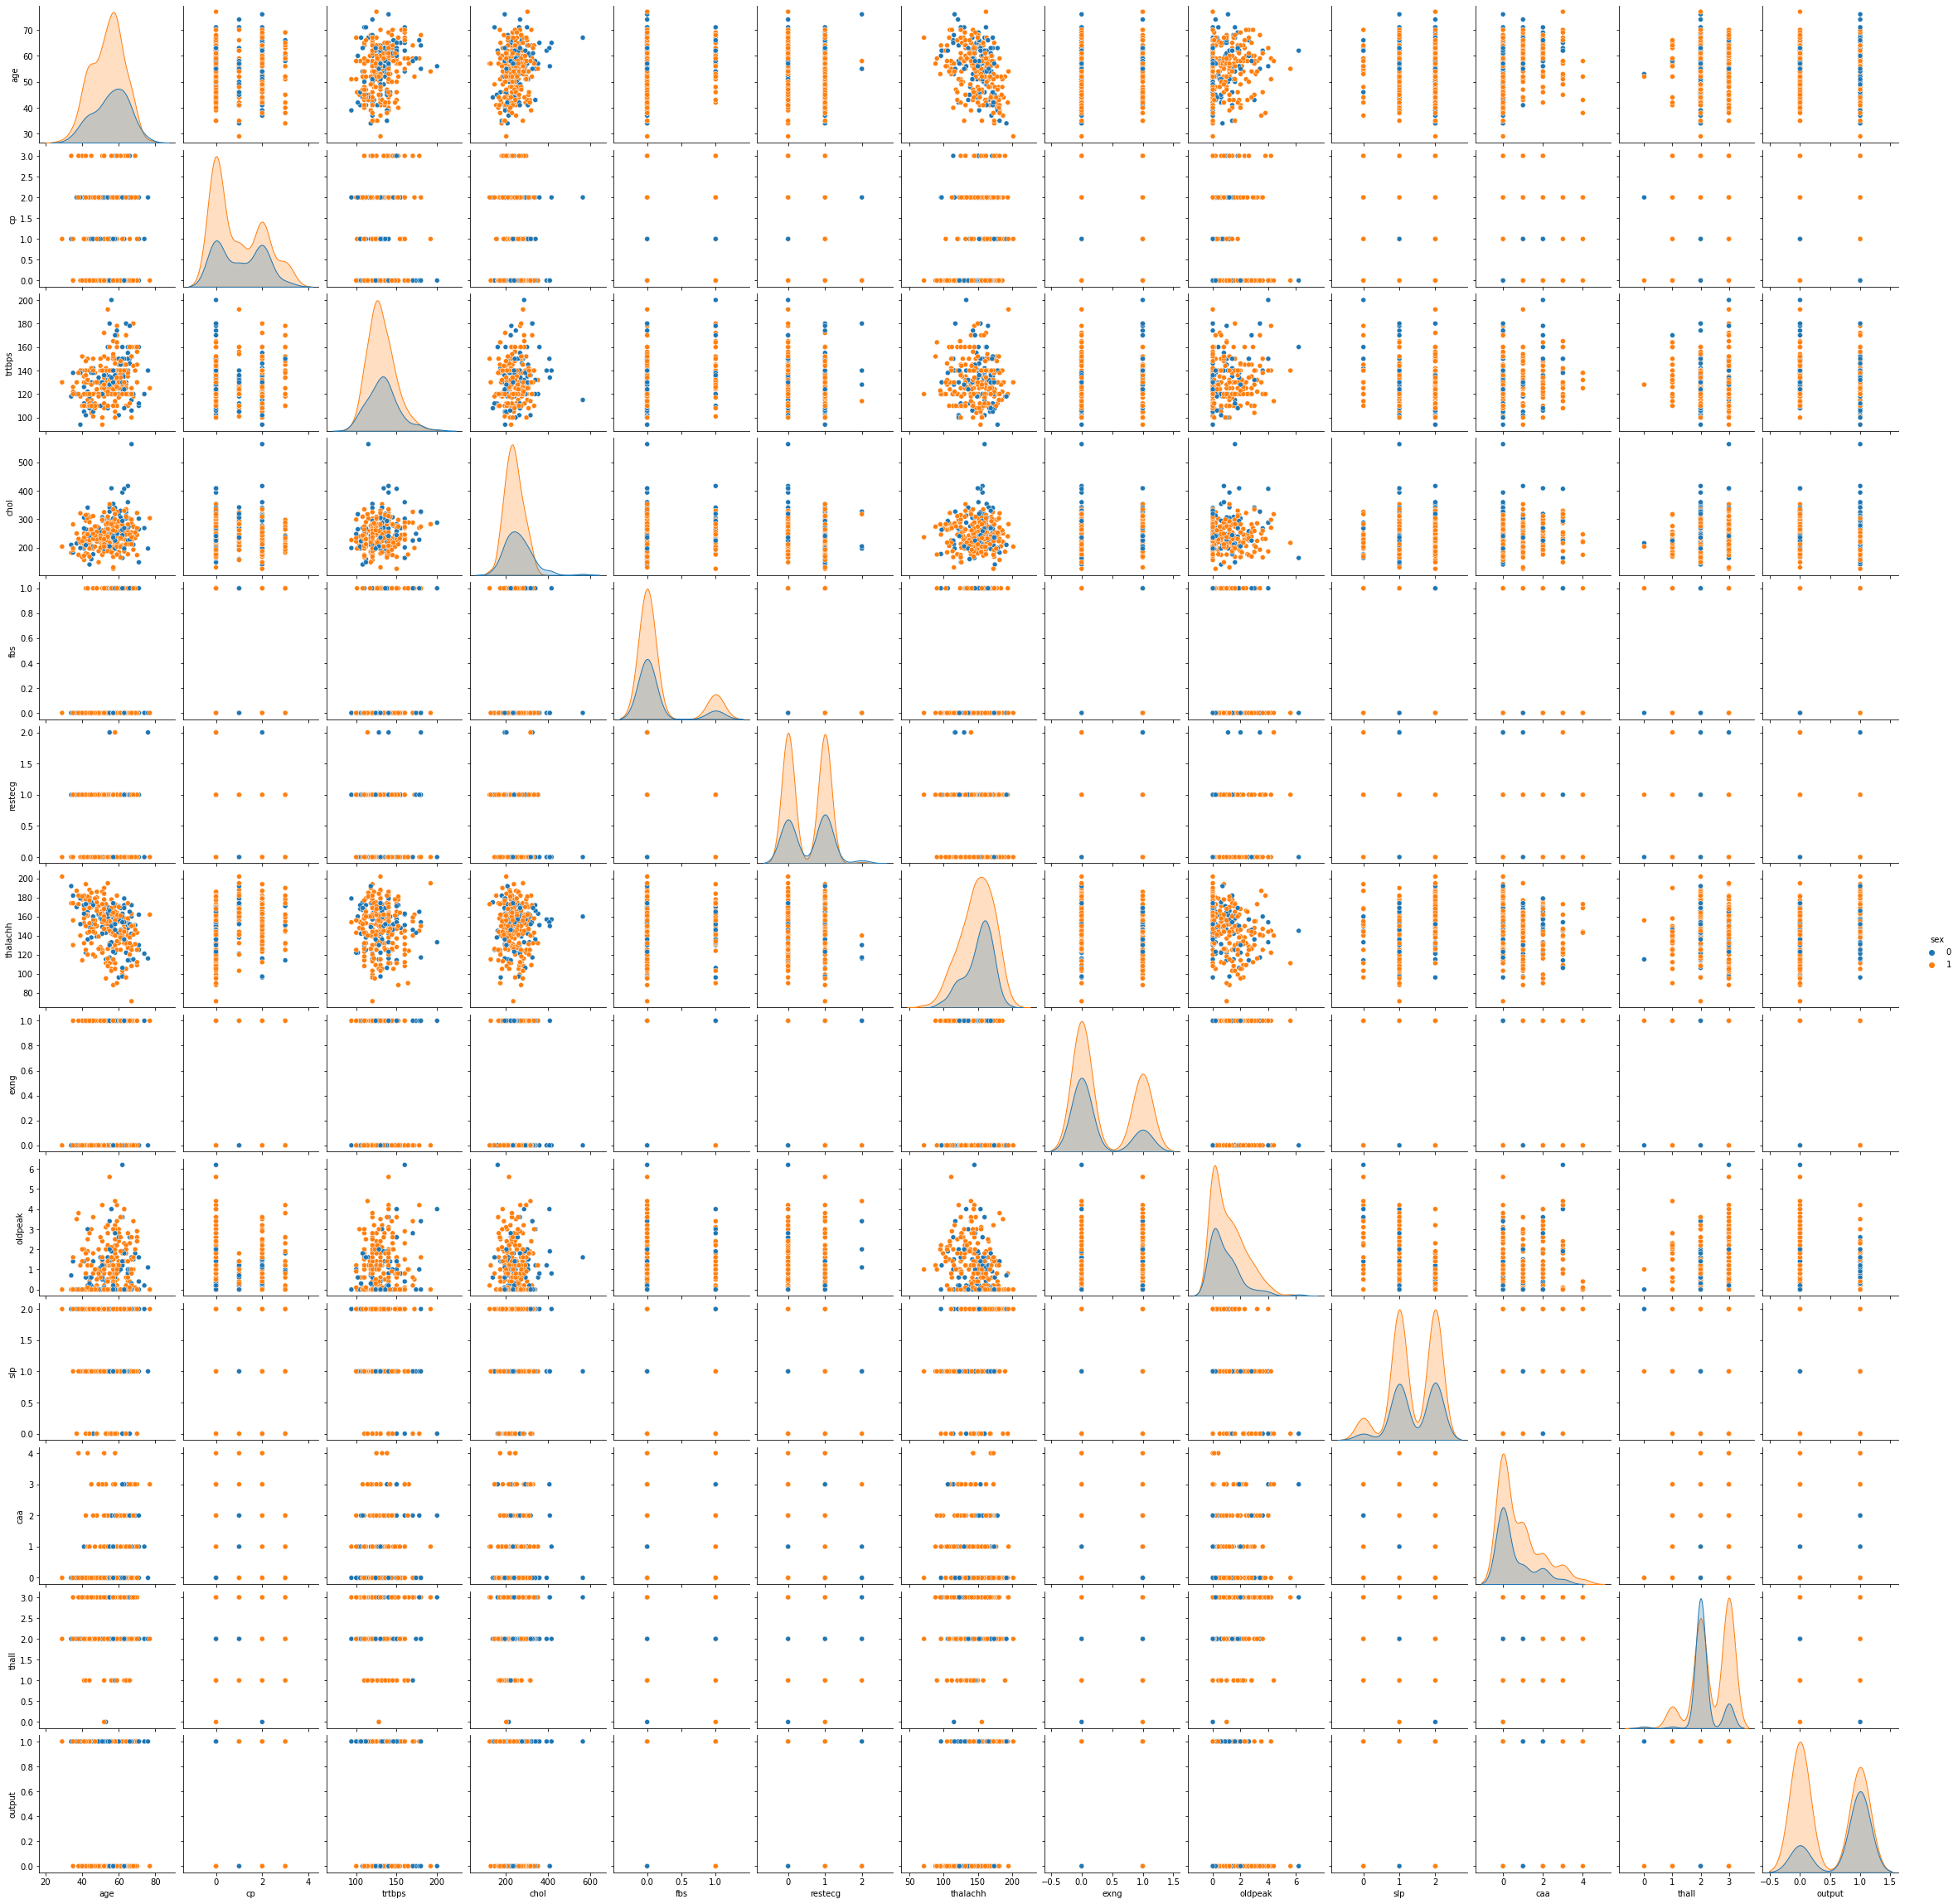

In [18]:
sns.pairplot(df, data=df, hue='sex')

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

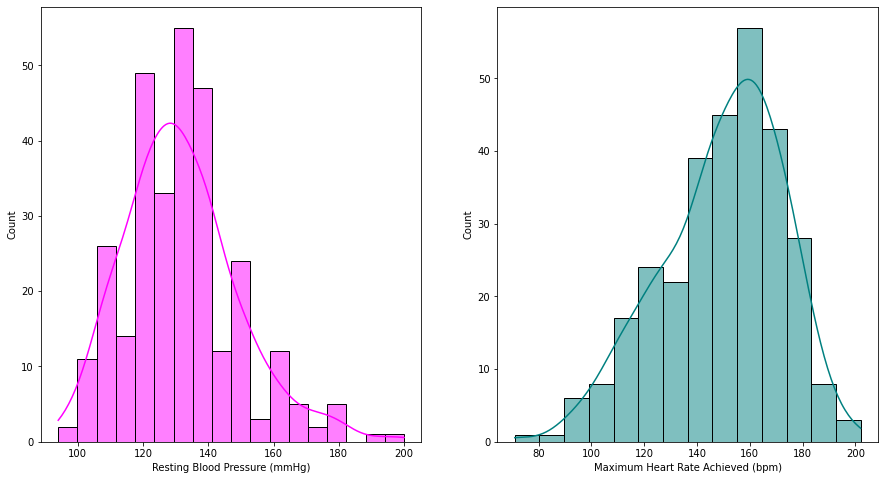

In [19]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.histplot(df['trtbps'], kde=True, color='Magenta')
plt.xlabel('Resting Blood Pressure (mmHg)')

plt.subplot(1,2,2)
sns.histplot(df['thalachh'], kde=True, color='Teal')
plt.xlabel('Maximum Heart Rate Achieved (bpm)')

Text(0.5, 0, 'Cholestrol')

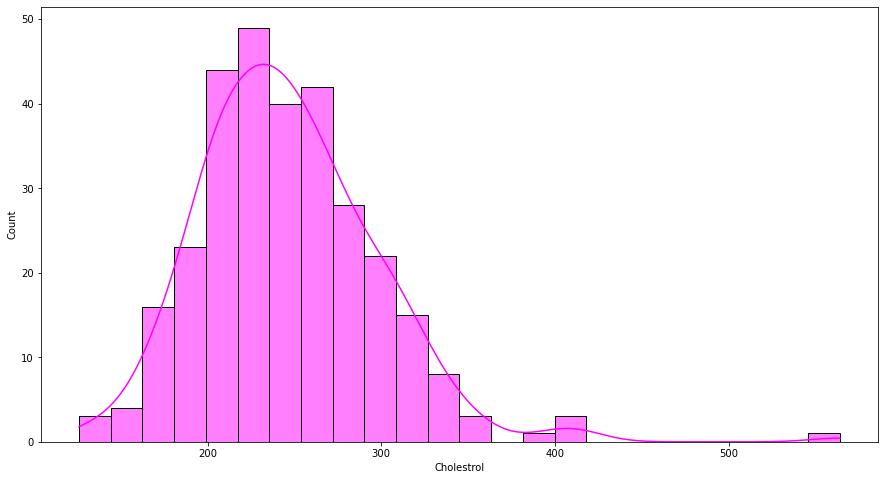

In [20]:
plt.figure(figsize=(15,8))
sns.histplot(df['chol'], kde=True, color='Magenta')
plt.xlabel('Cholestrol')

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Preprocessing

Befor processing the data, we'll seperate the numerical and categorical columns.

Split the Data

In [22]:
cat_data=[]
num_data=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cat_data.append(column)
    else:
        num_data.append(column)

In [23]:
print(f'Columns with Categorical values: {cat_data}')
print(f'Columns with Numerical values: {num_data}')

Columns with Categorical values: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
Columns with Numerical values: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


Encoding Categorical Columns

In [24]:
df['cp'].unique()
# To let model know that this is not an ordered column. We'll convert it into binary values.

array([3, 2, 1, 0], dtype=int64)

In [25]:
# We'll remove 'sex' and 'target' as it is already in binary format. Hence, Encoding is not required for such columns.
cat_data.remove('sex')
cat_data.remove('output')
print(cat_data)

['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']


Due to converting all the data into binary format, dummy variable trap problem arises. 
Dummy Variable Trap:- A independent variable is highly coorelated. In an simpler words, one variable can be predicted from other variables.
Removing first variable as it can be predicted from other variables. We can solve this dummy variable problem.

In [26]:
df=pd.get_dummies(df,columns=cat_data, drop_first=True)
print(df.head())

   age  sex  trtbps  chol  thalachh  oldpeak  output  cp_1  cp_2  cp_3  ...  \
0   63    1     145   233       150      2.3       1     0     0     1  ...   
1   37    1     130   250       187      3.5       1     0     1     0  ...   
2   41    0     130   204       172      1.4       1     1     0     0  ...   
3   56    1     120   236       178      0.8       1     1     0     0  ...   
4   57    0     120   354       163      0.6       1     0     0     0  ...   

   exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  thall_3  
0       0      0      0      0      0      0      0        1        0        0  
1       0      0      0      0      0      0      0        0        1        0  
2       0      0      1      0      0      0      0        0        1        0  
3       0      0      1      0      0      0      0        0        1        0  
4       1      0      1      0      0      0      0        0        1        0  

[5 rows x 23 columns]


Feature Scaling

It is required as our numerical data is not on the same range. So, scaling allows us to align our data in the same scale.
NOTE:- If our data is not on the same scale, then the data with high values tends to dominate which affect the efficiency of the model

Standardization 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale=StandardScaler()
# Based on Normal Standard Deviation

In [29]:
df[num_data]=scale.fit_transform(df[num_data])

In [30]:
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


Splitting the dataset into the training and testing data

In [31]:
# iloc:- It accepts only integer-value arguments. dataframe.iloc[rows,columns]
X=df.drop('output',axis=1) # print all rows and columns except last 1
print(X)

          age  sex    trtbps      chol  thalachh   oldpeak  cp_1  cp_2  cp_3  \
0    0.949794    1  0.764066 -0.261285  0.018826  1.084022     0     0     1   
1   -1.928548    1 -0.091401  0.067741  1.636979  2.118926     0     1     0   
2   -1.485726    0 -0.091401 -0.822564  0.980971  0.307844     1     0     0   
3    0.174856    1 -0.661712 -0.203222  1.243374 -0.209608     1     0     0   
4    0.285561    0 -0.661712  2.080602  0.587366 -0.382092     0     0     0   
..        ...  ...       ...       ...       ...       ...   ...   ...   ...   
298  0.285561    0  0.478910 -0.106449 -1.161988 -0.727060     0     0     0   
299 -1.042904    1 -1.232023  0.338703 -0.768384  0.135360     0     0     1   
300  1.503322    1  0.707035 -1.035462 -0.374779  2.032684     0     0     0   
301  0.285561    1 -0.091401 -2.235438 -1.511859  0.135360     0     0     0   
302  0.285561    0 -0.091401 -0.203222  1.068439 -0.899544     1     0     0   

     fbs_1  ...  exng_1  slp_1  slp_2  

In [32]:
y=df['output']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 20% data for train and 80% data for test

This data is inserted in our ML Models.

The models that we are going to use for our predictions:-
1. Logistic Regression
2. K-Nearest Neighbour
3. SVM
4. Decision Tree
5. Random Forest
6. Gradient Boost

Then, we'll use endemble techniques to hypertune our models


1. LOGISTIC REGRESSION


In [35]:
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr =LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred1=lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[[24  3]
 [ 4 30]]


<AxesSubplot:>

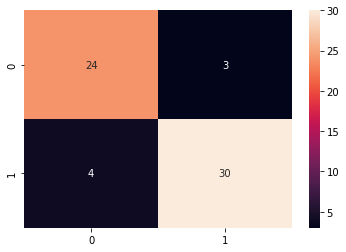

In [40]:
lr_conf_matrix=confusion_matrix(y_test, y_pred1)
print(lr_conf_matrix)
sns.heatmap(lr_conf_matrix, annot=True)

In [41]:
lr_acc_score=accuracy_score(y_test, y_pred1)
print(lr_acc_score)
print(lr_acc_score*100,'%')

0.8852459016393442
88.52459016393442 %


In [42]:
from sklearn.metrics import classification_report
lr_report = classification_report(y_test, y_pred1)
print(lr_report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



The accuracy of logistic regression model is 89% approx.

2. Support Vector Machine

In [43]:
from sklearn import svm

In [44]:
svm=svm.SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred2=svm.predict(X_test)

[[22  5]
 [ 6 28]]


<AxesSubplot:>

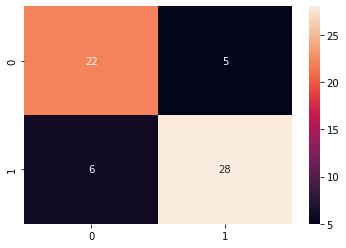

In [47]:
svm_conf_matrix=confusion_matrix(y_test, y_pred2)
print(svm_conf_matrix)
sns.heatmap(svm_conf_matrix, annot=True)

In [48]:
svm_acc_score=accuracy_score(y_test, y_pred2)
print(svm_acc_score)
print(svm_acc_score*100,'%')

0.819672131147541
81.9672131147541 %


In [49]:
svm_report = classification_report(y_test, y_pred2)
print(svm_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



The accuracy of Support Vecor Machine Model is 82% approx.



3. K Nearest Neighbour

For KNN, we have to find a value of K to attain maximum accuracy.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred3=knn.predict(X_test)

[[20  7]
 [ 4 30]]


<AxesSubplot:>

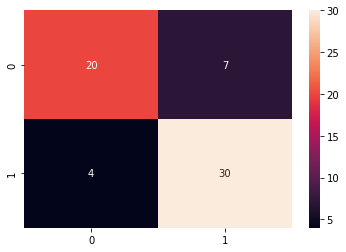

In [54]:
knn_conf_matrix=confusion_matrix(y_test, y_pred3)
print(knn_conf_matrix)
sns.heatmap(knn_conf_matrix, annot=True)

In [55]:
knn_acc_score=accuracy_score(y_test, y_pred3)
print(knn_acc_score)
print(knn_acc_score*100,'%')

0.819672131147541
81.9672131147541 %


In [56]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

print(score)

[0.7213114754098361, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.8524590163934426, 0.8688524590163934, 0.8360655737704918, 0.8688524590163934, 0.8524590163934426, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8524590163934426, 0.8524590163934426, 0.8360655737704918, 0.8688524590163934, 0.8852459016393442, 0.8688524590163934, 0.8360655737704918, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918]


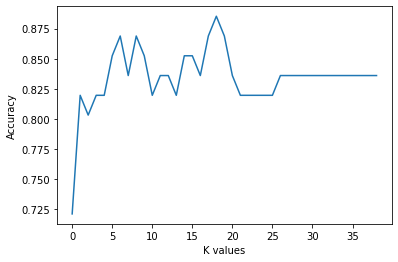

In [57]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()

In [58]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8688524590163934

The accuracy of K Nearest Neighbors is 87% approx.

Non-Linear ML Algorithms

For non-linear ml algorithms preprocessing is not required.
No Need to apply feature scaling and encoding.

In [59]:
data = pd.read_csv('heart.csv')
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [60]:
data=data.drop_duplicates()

In [61]:
data.shape

(302, 14)

In [62]:
X=data.drop('output',axis=1)
y=data['output']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

4. Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree= DecisionTreeClassifier()

In [66]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred4=tree.predict(X_test)

[[22  5]
 [ 8 26]]


<AxesSubplot:>

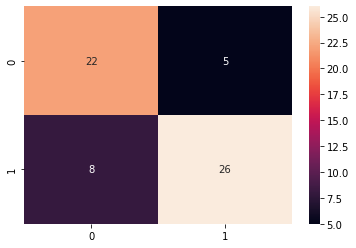

In [68]:
dt_conf_matrix=confusion_matrix(y_test, y_pred4)
print(dt_conf_matrix)
sns.heatmap(dt_conf_matrix, annot=True)

In [69]:
dt_acc_score=accuracy_score(y_test, y_pred4)
print(dt_acc_score)
print(dt_acc_score*100,'%')

0.7868852459016393
78.68852459016394 %


In [70]:
from sklearn.metrics import classification_report
dt_report = classification_report(y_test, y_pred4)
print(dt_report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



The Decision Tree Model performs better with a score of 79%

3. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier()

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_pred5=rf.predict(X_test)

[[24  3]
 [ 5 29]]


<AxesSubplot:>

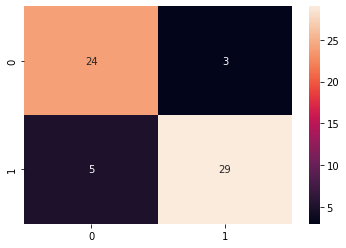

In [75]:
rf_conf_matrix=confusion_matrix(y_test, y_pred5)
print(rf_conf_matrix)
sns.heatmap(rf_conf_matrix, annot=True)

In [76]:
rf_acc_score=accuracy_score(y_test, y_pred5)
print(rf_acc_score)
print(rf_acc_score*100,'%')

0.8688524590163934
86.88524590163934 %


In [77]:
from sklearn.metrics import classification_report
rf_report = classification_report(y_test, y_pred5)
print(rf_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



The Random Forest Model performs better with a score of 85% approx.



6. Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gbc = GradientBoostingClassifier()

In [80]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [81]:
y_pred6=gbc.predict(X_test)

[[22  5]
 [ 6 28]]


<AxesSubplot:>

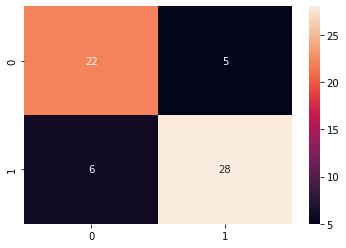

In [82]:
gbc_conf_matrix=confusion_matrix(y_test, y_pred6)
print(gbc_conf_matrix)
sns.heatmap(gbc_conf_matrix, annot=True)

In [83]:
gbc_acc_score=accuracy_score(y_test, y_pred6)
print(gbc_acc_score)
print(gbc_acc_score*100,'%')

0.819672131147541
81.9672131147541 %


In [84]:
gbc_report = classification_report(y_test, y_pred6)
print(gbc_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



The accuracy of Gradient Boost Classifier is 82% approx.

In [85]:
models=pd.DataFrame({'Models':['LR','SVM','KNN', 'DT', 'RF', 'GBC'],
                     'Accuracy(%)':[lr_acc_score*100, svm_acc_score*100, accuracy_score(y_test, y_pred)*100, dt_acc_score*100, rf_acc_score*100, gbc_acc_score*100]})

In [86]:
print(models)

  Models  Accuracy(%)
0     LR    88.524590
1    SVM    81.967213
2    KNN    86.885246
3     DT    78.688525
4     RF    86.885246
5    GBC    81.967213


<AxesSubplot:xlabel='Models', ylabel='Accuracy(%)'>

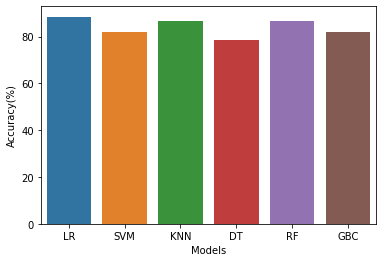

In [87]:
import seaborn as sns

sns.barplot(x=models['Models'],y=models['Accuracy(%)'])

For this dataset, Linear Regression is better than all other models with an accuracy of 89%.

Training the Linear Regression on the entire dataset

In [88]:
X=data.drop(['output'], axis=1)
y=data['output']

In [89]:
X.shape

(302, 13)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

Prediction on New Dataset

In [92]:
new_data= pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trtbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalachh':168,
    'exng':0,
    'oldpeak':1.0,
    'slp':2,
    'caa':2,
    'thall':3 
}, index=[0])

In [93]:
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [94]:
pred=rf.predict(new_data)

if pred[0]==0:
  print('No Heart Disease')
else:
  print('Heart Disease')

No Heart Disease


Save Model using Joblib

In [95]:
import joblib

In [96]:
joblib.dump(rf,'heart_model')

['heart_model']

In [97]:
heart=joblib.load('heart_model')

In [98]:
heart.predict(new_data)

array([0], dtype=int64)

GUI using Tkinter

In [100]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('heart_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System", bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
